# **Problem Statement :**

"You have a telecom firm which has collected data of all its customers"

The main types of attributes are :

1.Demographics (age, gender etc.)

2.Services availed (internet packs purchased, special offers etc)

3.Expenses (amount of recharge done per month etc.)
Based on all this past information, you want to build a model which will predict whether a particular customer will churn or not.
So the variable of interest, i.e. the target variable here is ‘Churn’ which will tell us whether or not a particular customer has churned. It is a binary variable 1 means that the customer has churned and 0 means the customer has not churned.

With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not.


**Import required packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsa

**Read Train and Test Data**

In [ ]:
df_chur=pd.read_excel('/content/drive/MyDrive/intenship/telecomCustomer churmprediction/churn_data.xlsx')
df_cust=pd.read_csv('/content/drive/MyDrive/intenship/telecomCustomer churmprediction/customer_data.csv')
df_inter=pd.read_csv('/content/drive/MyDrive/intenship/telecomCustomer churmprediction/internet_data.csv')

**Understanding the Data**



In [ ]:
df_chur.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1.0,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34.0,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2.0,Yes,Month-to-month,Yes,Mailed check,53.85,NaN,Yes
3,7795-CFOCW,45.0,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2.0,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
df_inter.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [ ]:
df_chur.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df_cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

In [ ]:
df_inter.columns

Index(['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
merged_data = df_cust.merge(df_inter[['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']], on='customerID', how='inner').merge(df_chur[['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']], on='customerID', how='inner')

In [ ]:
merged_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1.0,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34.0,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2.0,Yes,Month-to-month,Yes,Mailed check,53.85,NaN,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45.0,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2.0,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
merged_data.shape

(7042, 21)

In [ ]:
merged_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
tenure              float64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
merged_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               4
PhoneService         3
Contract             2
PaperlessBilling     3
PaymentMethod        7
MonthlyCharges      14
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
merged_data['TotalCharges'] = pd.to_numeric(merged_data['TotalCharges'], errors='coerce')


In [ ]:
merged_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1.0,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34.0,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2.0,Yes,Month-to-month,Yes,Mailed check,53.85,NaN,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45.0,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2.0,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
merged_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
tenure              float64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:

merged_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7042.000000,7038.000000,7028.000000,7020.000000
mean,0.162170,32.359761,64.741641,2282.507422
std,0.368633,24.554612,30.098308,2266.707179
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,400.900000
50%,0.000000,29.000000,70.325000,1397.100000
75%,0.000000,55.000000,89.850000,3789.800000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
merged_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               4
PhoneService         3
Contract             2
PaperlessBilling     3
PaymentMethod        7
MonthlyCharges      14
TotalCharges        22
Churn                0
dtype: int64

In [ ]:
merged_data['tenure'].fillna(merged_data['tenure'].median(),inplace=True)
merged_data['PhoneService'].fillna(merged_data['PhoneService'].mode()[0],inplace=True)
merged_data['Contract'].fillna(merged_data['Contract'].mode()[0],inplace=True)
merged_data['PaperlessBilling'].fillna(merged_data['PaperlessBilling'].mode()[0],inplace=True)
merged_data['PaymentMethod'].fillna(merged_data['PaymentMethod'].mode()[0],inplace=True)
merged_data['MonthlyCharges'].fillna(merged_data['MonthlyCharges'].median(),inplace=True)
merged_data['TotalCharges'].fillna(merged_data['TotalCharges'].median(),inplace=True)

In [ ]:
merged_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Univariate Analysis**

**Target Variable**

In [ ]:
merged_data["Churn"].count()


7042

In [ ]:
merged_data["Churn"].value_counts()

No     5173
Yes    1869
Name: Churn, dtype: int64

In [ ]:

merged_data["Churn"].value_counts(normalize=True)*100


No     73.459245
Yes    26.540755
Name: Churn, dtype: float64

<Axes: title={'center': 'Churn'}>

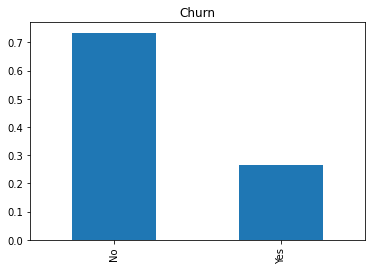

In [ ]:

merged_data["Churn"].value_counts(normalize=True).plot.bar(title = 'Churn')

**Independent Variable (Categorical)**

**Analysis on "Gender" variable :**



In [ ]:
merged_data["gender"].value_counts()

Male      3554
Female    3488
Name: gender, dtype: int64

In [ ]:
merged_data["gender"].value_counts(normalize=True)*100


Male      50.468617
Female    49.531383
Name: gender, dtype: float64

<Axes: title={'center': 'Gender'}>

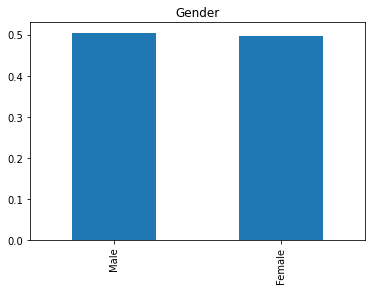

In [ ]:
merged_data["gender"].value_counts(normalize=True).plot.bar(title= 'Gender')


In our train dataset the "Gender" variable contain Male : 50.46% Female:49.53%

**Bivariate Analysis**

Categorical Independent Variable vs Target Variable

Relation between "gende" and "Churn"

Churn     No  Yes
gender           
Female  2549  939
Male    2624  930


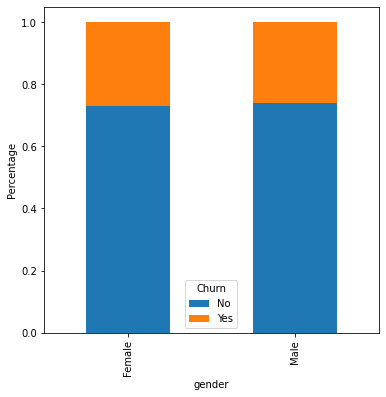

In [ ]:

print(pd.crosstab(merged_data["gender"],merged_data["Churn"]))
gender = pd.crosstab(merged_data["gender"],merged_data["Churn"])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.xlabel("gender")
plt.ylabel("Percentage")
plt.show()
     

In [ ]:
merged_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
tenure              float64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
merged_data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
gender=  {'Female':1, 'Male':2}
merged_data.gender=[gender[i] for i in merged_data.gender]
merged_data['gender'].unique()

array([1, 2])

In [ ]:
merged_data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Partner=  {'Yes':1, 'No':2}
merged_data.Partner=[Partner[i] for i in merged_data.Partner]
merged_data['Partner'].unique()

array([1, 2])

In [ ]:
merged_data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
Dependents=  {'No':1, 'Yes':2}
merged_data.Dependents=[Dependents[i] for i in merged_data.Dependents]
merged_data['Dependents'].unique()

array([1, 2])

In [ ]:
merged_data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [ ]:
MultipleLines=  {'No phone service':1,'No':2, 'Yes':3}
merged_data.MultipleLines=[MultipleLines[i] for i in merged_data.MultipleLines]
merged_data['MultipleLines'].unique()

array([1, 2, 3])

In [ ]:
merged_data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
InternetService=  {'DSL':1,'Fiber optic':2, 'No':3}
merged_data.InternetService=[InternetService[i] for i in merged_data.InternetService]
merged_data['InternetService'].unique()

array([1, 2, 3])

In [ ]:
merged_data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
OnlineSecurity=  {'No':1,'Yes':2, 'No internet service':3}
merged_data.OnlineSecurity=[OnlineSecurity[i] for i in merged_data.OnlineSecurity]
merged_data['OnlineSecurity'].unique()

array([1, 2, 3])

In [ ]:
merged_data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
OnlineBackup=  {'Yes':1,'No':2, 'No internet service':3}
merged_data.OnlineBackup=[OnlineBackup[i] for i in merged_data.OnlineBackup]
merged_data['OnlineBackup'].unique()

array([1, 2, 3])

In [ ]:
merged_data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
DeviceProtection=  {'No':1,'Yes':2, 'No internet service':3}
merged_data.DeviceProtection=[DeviceProtection[i] for i in merged_data.DeviceProtection]
merged_data['DeviceProtection'].unique()

array([1, 2, 3])

In [ ]:
merged_data['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
TechSupport=  {'No':1,'Yes':2, 'No internet service':3}
merged_data.TechSupport=[TechSupport[i] for i in merged_data.TechSupport]
merged_data['TechSupport'].unique()

array([1, 2, 3])

In [ ]:
merged_data['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
StreamingTV=  {'No':1,'Yes':2, 'No internet service':3}
merged_data.StreamingTV=[StreamingTV[i] for i in merged_data.StreamingTV]
merged_data['StreamingTV'].unique()

array([1, 2, 3])

In [ ]:
merged_data['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
StreamingMovies=  {'No':1,'Yes':2, 'No internet service':3}
merged_data.StreamingMovies=[StreamingMovies[i] for i in merged_data.StreamingMovies]
merged_data['StreamingMovies'].unique()

array([1, 2, 3])

In [ ]:
merged_data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
PhoneService=  {'No':1,'Yes':2}
merged_data.PhoneService=[PhoneService[i] for i in merged_data.PhoneService]
merged_data['PhoneService'].unique()

array([1, 2])

In [ ]:
merged_data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
Contract=  {'Month-to-month':1,'One year':2, 'Two year':3}
merged_data.Contract=[Contract[i] for i in merged_data.Contract]
merged_data['Contract'].unique()

array([1, 2, 3])

In [ ]:
merged_data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
PaperlessBilling=  {'No':1,'Yes':2}
merged_data.PaperlessBilling=[PaperlessBilling[i] for i in merged_data.PaperlessBilling]
merged_data['PaperlessBilling'].unique()

array([2, 1])

In [ ]:
merged_data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
PaymentMethod=  {'Electronic check':1,'Mailed check':2, 'Bank transfer (automatic)':3, 'Credit card (automatic)':4}
merged_data.PaymentMethod=[PaymentMethod[i] for i in merged_data.PaymentMethod]
merged_data['PaymentMethod'].unique()

array([1, 2, 3, 4])

In [ ]:
merged_data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
Churn=  {'No':1,'Yes':2}
merged_data.Churn=[Churn[i] for i in merged_data.Churn]
merged_data['Churn'].unique()

array([1, 2])

In [ ]:
merged_data.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
tenure              float64
PhoneService          int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
merged_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,1,1,1,1,1,1,1,1,1,1.0,1,1,2,1,29.85,29.85,1
1,5575-GNVDE,2,0,2,1,2,1,2,2,2,1,1,1,34.0,2,2,1,2,56.95,1889.50,1
2,3668-QPYBK,2,0,2,1,2,1,2,1,1,1,1,1,2.0,2,1,2,2,53.85,1397.10,2
3,7795-CFOCW,2,0,2,1,1,1,2,2,2,2,1,1,45.0,1,2,1,3,42.30,1840.75,1
4,9237-HQITU,1,0,2,1,2,2,1,2,1,1,1,1,2.0,2,1,2,1,70.70,151.65,2


In [ ]:
merged_data.describe()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000
mean,1.504686,0.162170,1.516899,1.299631,2.325050,1.872905,1.719966,1.871769,1.777194,1.723516,1.817665,1.821216,32.357853,1.903153,1.690003,1.592161,2.313831,64.752741,2279.741309,1.265408
std,0.500014,0.368633,0.499750,0.458129,0.642764,0.737847,0.796935,0.738420,0.778877,0.795946,0.763263,0.761776,24.547767,0.295771,0.833563,0.491468,1.149303,30.069399,2263.702590,0.441581
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,18.250000,18.800000,1.000000
25%,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,2.000000,1.000000,1.000000,1.000000,35.512500,402.525000,1.000000
50%,2.000000,0.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,29.000000,2.000000,1.000000,2.000000,2.000000,70.325000,1397.100000,1.000000
75%,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,55.000000,2.000000,2.000000,2.000000,3.000000,89.850000,3778.075000,2.000000
max,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,72.000000,2.000000,3.000000,2.000000,4.000000,118.750000,8684.800000,2.000000


<Axes: >

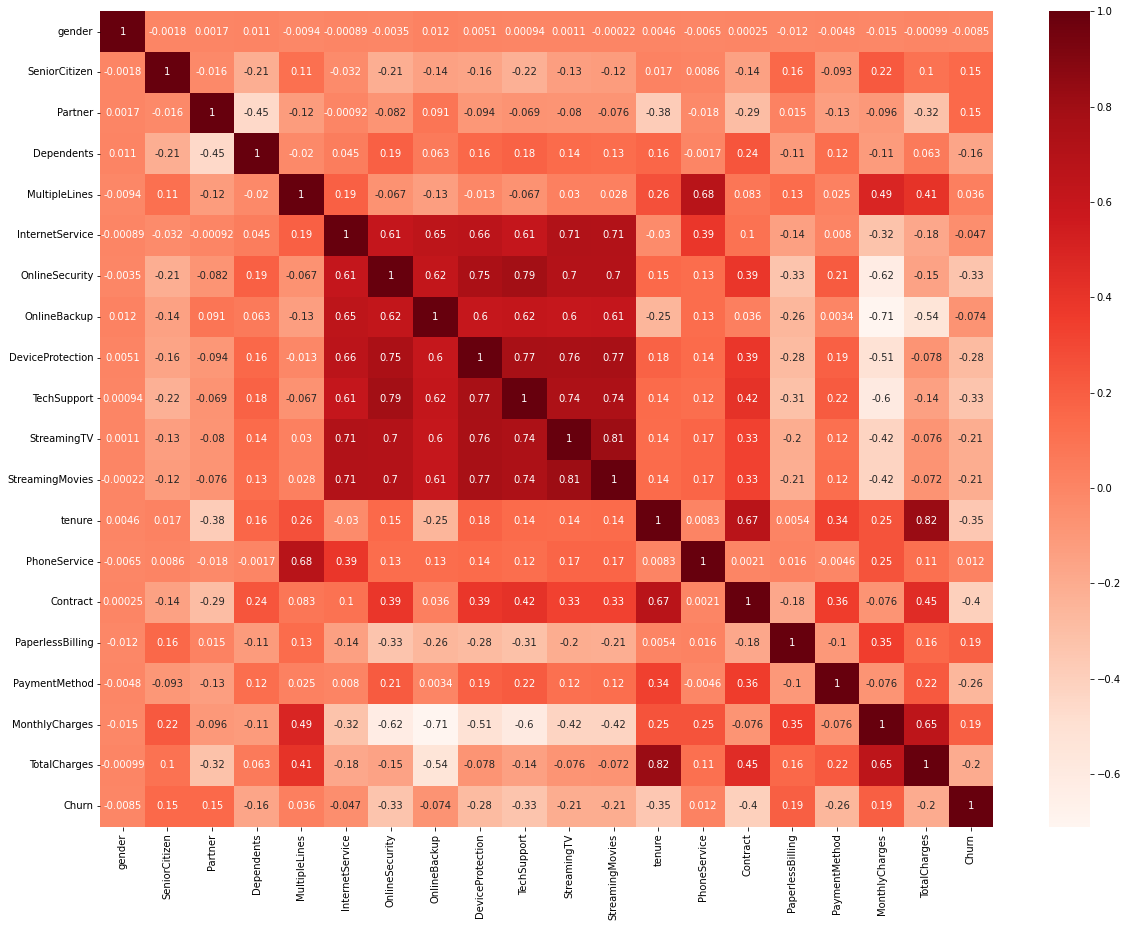

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(merged_data.corr(), annot=True, cmap='Reds')

In [ ]:
merged_data= merged_data.drop("tenure", axis=1)

<Axes: >

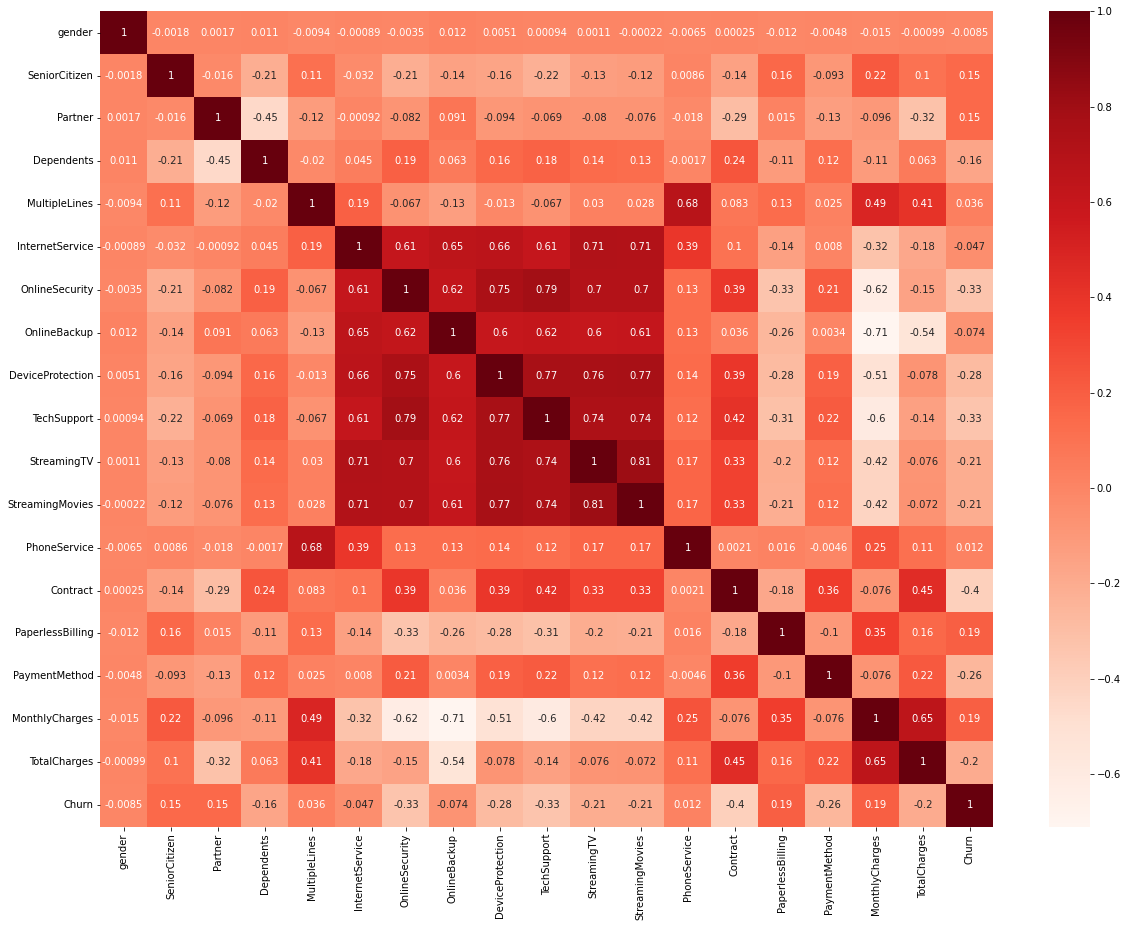

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(merged_data.corr(), annot=True, cmap='Reds')

In [ ]:

merged_data=merged_data.drop(['customerID'],axis=1)

In [ ]:
merged_data.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,1,1,1,1,1,1,1,1,1.0,1,1,2,1,29.85,29.85,1
1,2,0,2,1,2,1,2,2,2,1,1,1,34.0,2,2,1,2,56.95,1889.50,1
2,2,0,2,1,2,1,2,1,1,1,1,1,2.0,2,1,2,2,53.85,1397.10,2
3,2,0,2,1,1,1,2,2,2,2,1,1,45.0,1,2,1,3,42.30,1840.75,1
4,1,0,2,1,2,2,1,2,1,1,1,1,2.0,2,1,2,1,70.70,151.65,2


In [ ]:
train = merged_data.sample(frac=0.7, random_state=143)
test = merged_data.drop(train.Churn)

In [ ]:
train

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3024,2,0,2,2,2,3,3,3,3,3,3,3,9.0,2,1,1,2,20.40,184.10,1
0,1,0,1,1,1,1,1,1,1,1,1,1,1.0,1,1,2,1,29.85,29.85,1
5069,1,0,2,1,3,2,1,2,1,1,1,1,4.0,2,1,1,1,75.35,338.10,2
4100,2,0,1,1,2,3,3,3,3,3,3,3,50.0,2,3,1,1,19.80,1013.20,1
6871,1,0,1,1,3,2,1,1,2,1,2,1,52.0,2,1,1,3,94.60,5025.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,1,0,1,1,2,1,2,1,2,2,2,2,70.0,2,3,1,4,86.45,5950.20,1
2631,2,1,1,1,3,2,1,2,2,1,2,2,7.0,2,1,2,1,99.25,665.45,2
552,2,0,1,2,2,3,3,3,3,3,3,3,55.0,2,3,1,3,19.35,1153.25,1
5448,1,0,1,2,3,2,2,1,2,1,1,2,41.0,2,2,2,3,101.60,3930.55,1


In [ ]:
train.shape

(4929, 20)

In [ ]:
X_train = train.drop('Churn', axis=1)
y_train = train['Churn']
X_test = test.drop('Churn', axis=1)
y_test = test['Churn']

**Model Building**

In [ ]:
import numpy as np
from collections import Counter
import random

def gini_impurity(y):
    """Calculate the Gini impurity of a list of class labels."""
    counter = Counter(y)
    impurity = 1
    for label in counter:
        prob = counter[label] / len(y)
        impurity -= prob ** 2
    return impurity

def split_data(X, y, feature, threshold):
    """Split the data based on a feature and threshold."""
    left_X, left_y, right_X, right_y = [], [], [], []
    for i in range(len(X)):
        if X[i][feature] < threshold:
            left_X.append(X[i])
            left_y.append(y[i])
        else:
            right_X.append(X[i])
            right_y.append(y[i])
    return np.array(left_X), np.array(left_y), np.array(right_X), np.array(right_y)

def find_best_split(X, y):
    """Find the best feature and threshold to split the data."""
    best_feature, best_threshold, best_gini = None, None, 1
    for feature in range(X.shape[1]):
        thresholds = list(set(X[:, feature]))
        if len(thresholds) == 1:
            continue  # skip if all values in feature are the same
        for threshold in thresholds:
            left_X, left_y, right_X, right_y = split_data(X, y, feature, threshold)
            if len(left_y) == 0 or len(right_y) == 0:
                continue
            gini = (len(left_y) / len(y)) * gini_impurity(left_y) + (len(right_y) / len(y)) * gini_impurity(right_y)
            if gini < best_gini:
                best_feature, best_threshold, best_gini = feature, threshold, gini
    return best_feature, best_threshold

class DecisionTree:
    """A decision tree for classification."""
    
    def __init__(self, max_depth=None):
        self.left = None
        self.right = None
        self.feature = None
        self.threshold = None
        self.label = None
        self.max_depth = max_depth
    
    def fit(self, X, y, depth=0):
        """Build the decision tree recursively."""
        if self.max_depth is not None and depth >= self.max_depth:
            self.label = Counter(y).most_common()[0][0]
            return
        if len(set(y)) == 1:
            self.label = y[0]
            return
        best_feature, best_threshold = find_best_split(X, y)
        self.feature = best_feature
        self.threshold = best_threshold
        left_X, left_y, right_X, right_y = split_data(X, y, best_feature, best_threshold)
        self.left = DecisionTree(max_depth=self.max_depth)
        self.right = DecisionTree(max_depth=self.max_depth)
        self.left.fit(left_X, left_y, depth+1)
        self.right.fit(right_X, right_y, depth+1)
    
    def predict(self, X):
        """Make predictions for a list of samples."""
        predictions = []
        for sample in X:
            node = self
            while node.label is None:
                if sample[node.feature] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            predictions.append(node.label)
        return np.array(predictions)

class RandomForestClassifier:
    """A random forest classifier."""
    
    def __init__(self,n_trees=10, n_estimators=100, max_depth=None, max_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.max_features = max_features
    
    def fit(self, X, y):
        """Build the random forest classifier."""
        self.trees = []
        self.feature_indices = []
        n_features = X.shape[1]
        if self.max_features is None:
            self.max_features = int(np.sqrt(n_features))
        for i in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth)
            feature_indices = random.sample(range(n_features), self.max_features)
            self.feature_indices.append(feature_indices)
            tree_X = X[:, feature_indices]
            tree.fit(tree_X, y)
            self.trees.append(tree)
    
    def predict(self, X):
        """Make predictions for a list of samples."""
        predictions = []
        for i in range(self.n_trees):
            tree = self.trees[i]
            feature_indices = self.feature_indices[i]
            tree_X = X[:, feature_indices]
            tree_predictions = tree.predict(tree_X)
            predictions.append(tree_predictions)
        predictions = np.array(predictions)
        return np.apply_along_axis(lambda x: Counter(x).most_common()[0][0], axis=0, arr=predictions)

In [ ]:
clf = RandomForestClassifier(n_estimators=100,max_depth=5,max_features=5)
clf.fit(X_train.values,y_train.values.ravel())

# Make predictions on the test data
y_pred = clf.predict(X_test.values)


In [ ]:
def accuracy_score(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

In [ ]:
accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7975852272727273


In [1]:

# define the evaluate function
def evaluate(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    precision = np.sum((y_true == 1) & (y_pred == 1)) / np.sum(y_pred == 1)
    recall = np.sum((y_true == 1) & (y_pred == 1)) / np.sum(y_true == 1)
    f1_score = 2 * precision * recall / (precision + recall)
    confusion_matrix = np.zeros((2, 2))
    for i in range(len(y_true)):
        confusion_matrix[int(y_true[i]), int(y_pred[i])] += 1
    return accuracy, precision, recall, f1_score, confusion_matrix

In [2]:
# define the GridSearch function
def grid_search(X_train, y_train, X_test, y_test, n_trees_range, max_depth_range, min_samples_split_range):
    best_accuracy = 0
    best_params = None
    for n_trees in n_trees_range:
        for max_depth in max_depth_range:
            for min_samples_split in min_samples_split_range:
                # train the classifier using the current hyperparameters
                trees = random_forest(X_train, y_train, n_trees)
                y_pred = predict(X_test, trees)
                # evaluate the performance of the classifier
                accuracy, _, _, _, _ = evaluate(y_test, y_pred)
                # update the best hyperparameters if necessary
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'n_trees': n_trees, 'max_depth': max_depth, 'min_samples_split': min_samples_split}
    return best_params


In [3]:

# Define the hyperparameters to search over
max_depth_list = [3, 5, 7, 10]
min_samples_split_list = [2, 4, 6, 8]
min_samples_leaf_list = [1, 2, 3, 4]
     